In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
plt.rcParams.update({'font.size': 16, 'lines.markersize': 8})
cmap = get_cmap('tab10').colors

In [2]:
def get_U_err(U):
    return 5e-5*U + 35e-6*0.1

In [3]:
data_c  = np.loadtxt('data0002.dat')
data_h = np.loadtxt('data0003.dat')
x_cool = data_c[:,0][(data_c[:,0] < 0.0055) & (data_c[:,0] > 0.003)]
y_cool = data_c[:,1][(data_c[:,0] < 0.0055) & (data_c[:,0] > 0.003)]
x_heat = data_h[:,0][(data_h[:,0] < 0.0055) & (data_h[:,0] > 0.003)]
y_heat = data_h[:,1][(data_h[:,0] < 0.0055) & (data_h[:,0] > 0.003)]

# Masks for the different linear regressions:
m_cool_sc1 = x_cool < 0.0034
#m_cool_pt = (x_cool < 0.0042) & (x_cool > 0.0037) # Nur linearer Bereich in der Mitte
#m_cool_pt = (x_cool < 0.0045) & (x_cool > 0.0034) # Ganzer Wertebereich
m_cool_sc2 = (x_cool < 0.00365) & (x_cool > 0.00345) 
m_cool_norm1 = (x_cool < 0.0042) & (x_cool > 0.00365)
m_cool_norm2 = x_cool > 0.0047

# Fitting cooling:
f = lambda x, a, b: a*x + b
p_cool_sc1, cov_cool_sc1 = curve_fit(f, x_cool[m_cool_sc1], y_cool[m_cool_sc1], sigma=get_U_err(y_cool[m_cool_sc1]), absolute_sigma=True)
p_cool_sc2, cov_cool_sc2 = curve_fit(f, x_cool[m_cool_sc2], y_cool[m_cool_sc2], sigma=get_U_err(y_cool[m_cool_sc2]), absolute_sigma=True)
p_cool_norm1, cov_cool_norm1 = curve_fit(f, x_cool[m_cool_norm1], y_cool[m_cool_norm1], sigma=get_U_err(y_cool[m_cool_norm1]), absolute_sigma=True)
p_cool_norm2, cov_cool_norm2 = curve_fit(f, x_cool[m_cool_norm2], y_cool[m_cool_norm2], sigma=get_U_err(y_cool[m_cool_norm2]), absolute_sigma=True)
# Get intercepts:
x_cool_1 = (p_cool_sc2[1] - p_cool_sc1[1]) / (p_cool_sc1[0] - p_cool_sc2[0])
y_cool_1 = p_cool_sc1[0]*x_cool_1 + p_cool_sc1[1]
x_cool_2 = (p_cool_norm2[1] - p_cool_norm1[1]) / (p_cool_norm1[0] - p_cool_norm2[0])
y_cool_2 = p_cool_norm1[0]*x_cool_2 + p_cool_norm1[1]
#--------------------------------------------------------------------------------------------
# Masks for the different linear regressions:
m_heat_sc1 = x_heat < 0.0034
m_heat_sc2 = (x_heat < 0.00355) & (x_heat > 0.00342) 
m_heat_norm1 = (x_heat < 0.004) & (x_heat > 0.0036)
m_heat_norm2 = x_heat > 0.0044

# Fitting heating:
f = lambda x, a, b: a*x + b
p_heat_sc1, cov_heat_sc1 = curve_fit(f, x_heat[m_heat_sc1], y_heat[m_heat_sc1], sigma=get_U_err(y_heat[m_heat_sc1]), absolute_sigma=True)
p_heat_sc2, cov_heat_sc2 = curve_fit(f, x_heat[m_heat_sc2], y_heat[m_heat_sc2], sigma=get_U_err(y_heat[m_heat_sc2]), absolute_sigma=True)
p_heat_norm1, cov_heat_norm1 = curve_fit(f, x_heat[m_heat_norm1], y_heat[m_heat_norm1], sigma=get_U_err(y_heat[m_heat_norm1]), absolute_sigma=True)
p_heat_norm2, cov_heat_norm2 = curve_fit(f, x_heat[m_heat_norm2], y_heat[m_heat_norm2], sigma=get_U_err(y_heat[m_heat_norm2]), absolute_sigma=True)
# Get intercepts:
x_heat_1 = (p_heat_sc2[1] - p_heat_sc1[1]) / (p_heat_sc1[0] - p_heat_sc2[0])
y_heat_1 = p_heat_sc1[0]*x_heat_1 + p_heat_sc1[1]
x_heat_2 = (p_heat_norm2[1] - p_heat_norm1[1]) / (p_heat_norm1[0] - p_heat_norm2[0])
y_heat_2 = p_heat_norm1[0]*x_heat_2 + p_heat_norm1[1]

In [4]:
def plotter_helper(x, popt, l_overhang=0.25, r_overhang=0.25):
    xmin, xmax = np.min(x), np.max(x)
    dx = (xmax - xmin)
    x = np.linspace(xmin-dx*l_overhang, xmax+dx*r_overhang, 2)
    return x*1e3, f(x, *popt)*1e3

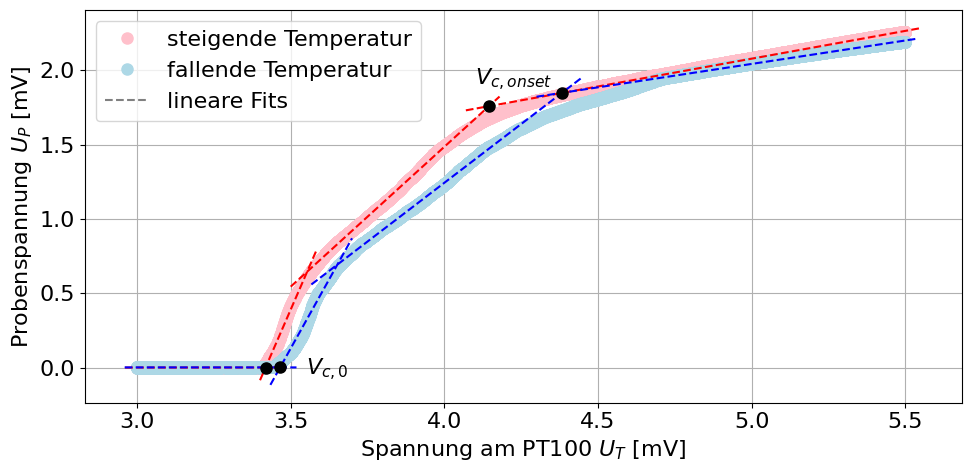

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x_heat*1e3, y_heat*1e3, 'o', color='pink', label='steigende Temperatur')
ax.plot(x_cool*1e3, y_cool*1e3, 'o', color='lightblue', label='fallende Temperatur')
ax.plot(*plotter_helper(x_heat[m_heat_sc1], p_heat_sc1, 0.1,0.2), 'r--')
ax.plot(*plotter_helper(x_heat[m_heat_sc2], p_heat_sc2, 0.15,0.25), 'r--')
ax.plot(*plotter_helper(x_heat[m_heat_norm1], p_heat_norm1, 0.25,0.45), 'r--')
ax.plot(*plotter_helper(x_heat[m_heat_norm2], p_heat_norm2, 0.3,0.05), 'r--')

ax.plot(*plotter_helper(x_cool[m_cool_sc1], p_cool_sc1, 0.1, 0.3), 'b--')
ax.plot(*plotter_helper(x_cool[m_cool_sc2], p_cool_sc2, 0.08), 'b--')
ax.plot(*plotter_helper(x_cool[m_cool_norm1], p_cool_norm1, 0.15, 0.45), 'b--')
ax.plot(*plotter_helper(x_cool[m_cool_norm2], p_cool_norm2, 0.5, 0.05), 'b--')
ax.plot([x_heat_1*1e3, x_heat_2*1e3], [y_heat_1*1e3, y_heat_2*1e3], 'ok')
ax.plot([x_cool_1*1e3, x_cool_2*1e3], [y_cool_1*1e3, y_cool_2*1e3], 'ok')
ax.text(4.1, 1.9, '$V_{c,onset}$', fontsize=16)
ax.text(3.55, -0.05, '$V_{c,0}$', fontsize=16)

line = plt.Line2D([0], [0], label='lineare Fits', color='grey', linestyle='--')
handles, _ = ax.get_legend_handles_labels()
handles.append(line)
ax.legend(handles=handles)
ax.grid()
ax.set_xlabel('Spannung am PT100 $U_T$ [mV]')
ax.set_ylabel('Probenspannung $U_P$ [mV]')
fig.tight_layout()
fig.savefig('resistive.png', bbox_inches='tight', dpi=600)

In [7]:
def intersect_err(p1, p2, cov1, cov2):
    a1,b1 = p1
    a2,b2 = p2
    da1, db1 = np.sqrt(np.diag(cov1))
    da2, db2 = np.sqrt(np.diag(cov2))
    t1 = (db1 / (a1-a2))**2
    t2 = (db2 / (a1-a2))**2
    t3 = (da1*(b1-b2) / ((a1-a2)**2))**2
    t4 = (da2*(b1-b2) / ((a1-a2)**2))**2
    return np.sqrt(t1 + t2 + t3 + t4)

In [10]:
print('\t\t Tc0[mV]  - \t Tonset[mV]')
print('cooling:', x_cool_1*1e3, x_cool_2*1e3)
print('heating:', x_heat_1*1e3, x_heat_2*1e3)
print('Errors:')
print('\t\t Tc0[mV]  - \t Tonset[mV]')
print('cooling:', intersect_err(p_cool_sc1, p_cool_sc2, cov_cool_sc1, cov_cool_sc2)*1e3, intersect_err(p_cool_norm1, p_cool_norm2, cov_cool_norm1, cov_cool_norm2)*1e3)
print('heating:', intersect_err(p_heat_sc1, p_heat_sc2, cov_heat_sc1, cov_heat_sc2)*1e3, intersect_err(p_heat_norm1, p_heat_norm2, cov_heat_norm1, cov_heat_norm2)*1e3)

		 Tc0[mV]  - 	 Tonset[mV]
cooling: 3.4658988114085383 4.382960006829124
heating: 3.418484334561192 4.145445514287759
Errors:
		 Tc0[mV]  - 	 Tonset[mV]
cooling: 0.0024472626949891708 0.002488336463432149
heating: 0.004247027270235056 0.002142795700074334


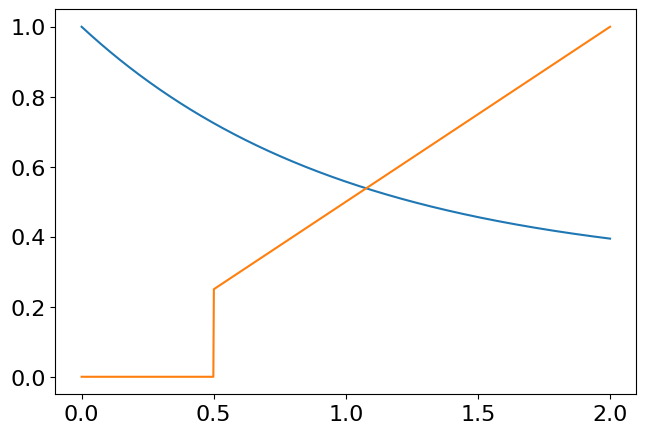

In [23]:
xs = np.linspace(0,2,1000)
def sc(x, lim):
    return np.piecewise(x, [x < lim, x >= lim], [0, lambda x: 0.5*x])

def condurctor(x):
    return 
fig,ax = plt.subplots(figsize=(7.5,5))
ax.plot(xs, 0.7*np.exp(-xs) + 0.3)
ax.plot(xs, sc(xs, 0.5))
